# ML Project Event entry

In [26]:
import pandas as pd

file_path = '/Users/Yajur/Downloads/Event_entry.csv'
df = pd.read_csv(file_path)

In [27]:
df.head()

,Entry,TicketClass,Sex,Age,Price,Order,Name,Ticket Number,Bank Balance
0,0,3,male,22.0,7,1,"Braund, Mr. Owen Harris",648155,74389
1,1,1,female,38.0,71,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",119239,94932
2,1,3,female,26.0,8,3,"Heikkinen, Miss. Laina",411408,26146
3,1,1,female,35.0,53,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",530093,35627
4,0,3,male,35.0,8,5,"Allen, Mr. William Henry",510583,60457


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entry          869 non-null    int64  
 1   TicketClass    869 non-null    int64  
 2   Sex            869 non-null    object 
 3   Age            694 non-null    float64
 4   Price          869 non-null    int64  
 5   Order          869 non-null    int64  
 6   Name           869 non-null    object 
 7   Ticket Number  869 non-null    int64  
 8   Bank Balance   869 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 61.2+ KB


In [29]:
df.isnull().sum()

Entry              0
TicketClass        0
Sex                0
Age              175
Price              0
Order              0
Name               0
Ticket Number      0
Bank Balance       0
dtype: int64

In [30]:
df.dtypes

Entry              int64
TicketClass        int64
Sex               object
Age              float64
Price              int64
Order              int64
Name              object
Ticket Number      int64
Bank Balance       int64
dtype: object

In [31]:
df.describe()

,Entry,TicketClass,Age,Price,Order,Ticket Number,Bank Balance
count,869.000000,869.000000,694.000000,869.000000,869.000000,869.000000,869.000000
mean,0.384350,2.307250,29.732233,32.594937,435.000000,479171.174914,50269.125432
std,0.486721,0.836222,14.599438,50.186076,251.002988,286307.965548,28158.833520
min,0.000000,1.000000,0.420000,0.000000,1.000000,1222.000000,108.000000
25%,0.000000,2.000000,20.125000,8.000000,218.000000,228933.000000,27438.000000
50%,0.000000,3.000000,28.000000,14.000000,435.000000,453195.000000,50588.000000
75%,1.000000,3.000000,38.000000,31.000000,652.000000,722522.000000,73549.000000
max,1.000000,3.000000,80.000000,512.000000,869.000000,999921.000000,99548.000000


# 1. Data Visualization

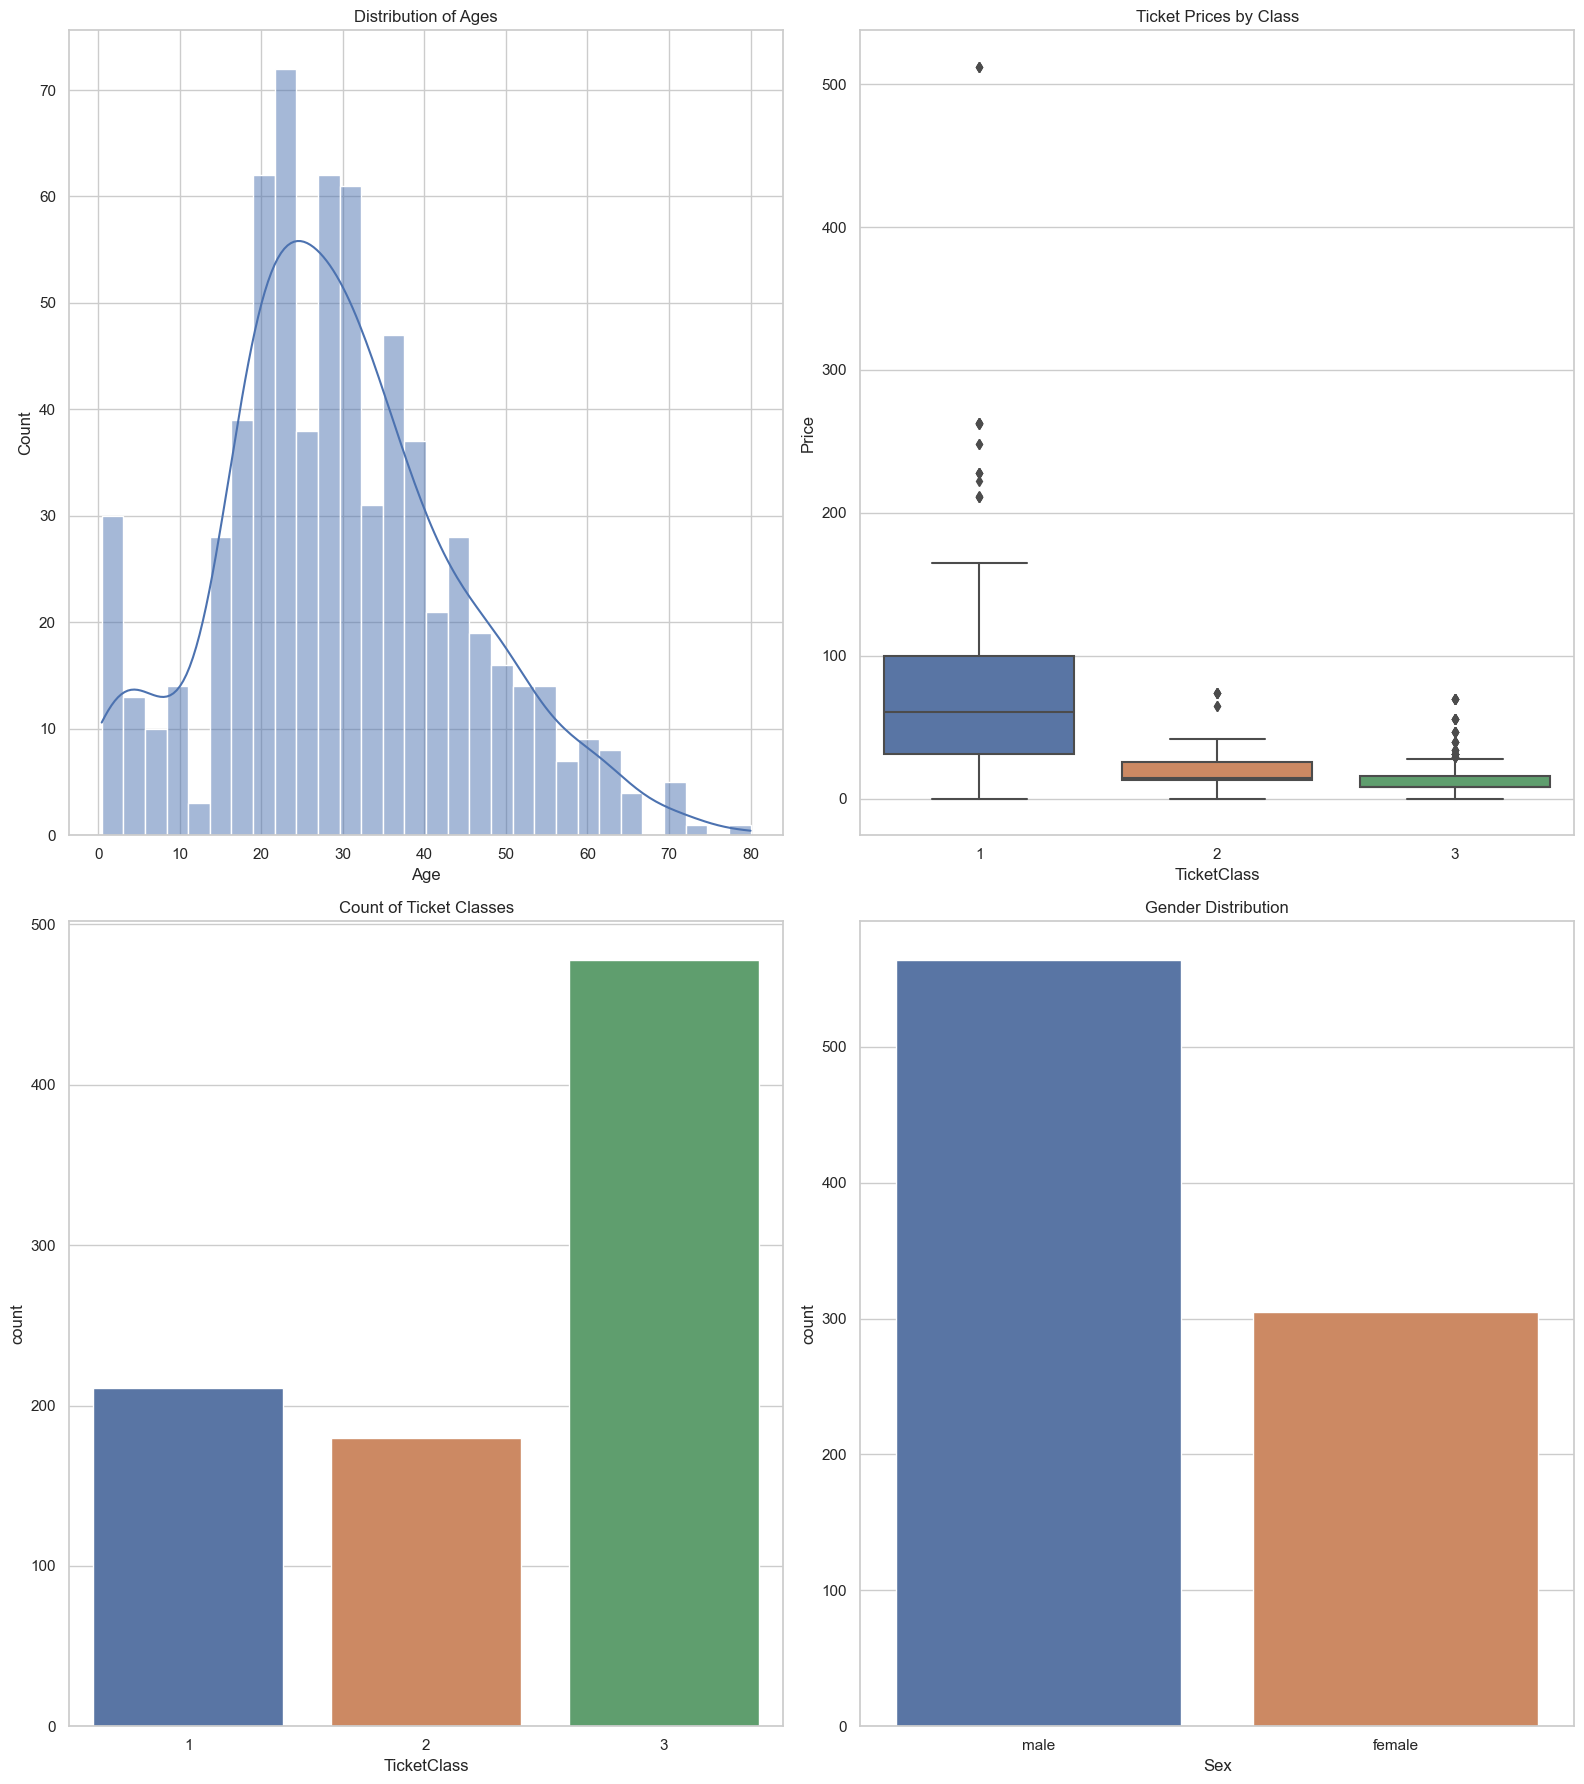

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 18))

# Histogram of Ages
sns.histplot(event_entry_data['Age'].dropna(), bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Ages')

# Box plot of Prices
sns.boxplot(x='TicketClass', y='Price', data=event_entry_data, ax=axes[0, 1])
axes[0, 1].set_title('Ticket Prices by Class')

# Count plot of TicketClass
sns.countplot(x='TicketClass', data=event_entry_data, ax=axes[1, 0])
axes[1, 0].set_title('Count of Ticket Classes')

# Count plot of Sex
sns.countplot(x='Sex', data=event_entry_data, ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution')

# Adjust layout
plt.tight_layout()

plt.show()

**Distribution of Ages:** The age distribution is right-skewed, indicating a younger population attending the event, with a peak around the late 20s.

**Ticket Prices by Class:** The box plot shows the variation in ticket prices within each ticket class. Higher classes tend to have higher prices, but there is significant overlap, especially between Class 2 and Class 3.

**Count of Ticket Classes:** The count plot shows the distribution of ticket classes, with the third class being the most common, indicating that a majority of the attendees purchased lower-class tickets.

**Gender Distribution:** The gender distribution is with a slight predominance of male over female.

In [33]:
# Drop missing values
df = df.dropna()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 867
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entry          694 non-null    int64  
 1   TicketClass    694 non-null    int64  
 2   Sex            694 non-null    object 
 3   Age            694 non-null    float64
 4   Price          694 non-null    int64  
 5   Order          694 non-null    int64  
 6   Name           694 non-null    object 
 7   Ticket Number  694 non-null    int64  
 8   Bank Balance   694 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 54.2+ KB


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [37]:
X = df.drop(['Entry', 'Name', 'Ticket Number'], axis=1) # Dropping 'Name' and 'Ticket Number'
y = df['Entry']

In [38]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((555, 6), (139, 6), (555,), (139,))

# 2. PCA Analysis

## Initial Logistic Regression Model

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

initial_accuracy = accuracy_score(y_test, y_pred)
initial_accuracy

0.8057553956834532

## 2. Apply PCA

In [40]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

def pca_function(dimensions, X_train, X_test, y_train, y_test):
    results = {}
    for dim in dimensions:
        
        pca = PCA(n_components=dim, random_state=42)
        
        pipeline = make_pipeline(pca, LogisticRegression(max_iter=1000, random_state=42))
        
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        results[dim] = accuracy
    
    return results

# Evaluate PCA with 2, 4, and 6 dimensions
dimensions = [2, 4, 6]
pca_results = pca_function(dimensions, X_train, X_test, y_train, y_test)
pca_results

{2: 0.6402877697841727, 4: 0.6762589928057554, 6: 0.7913669064748201}

## 3. Lasso

In [42]:
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

lasso_accuracy = accuracy_score(y_test, y_pred_lasso)
lasso_accuracy

0.8201438848920863

In summary, the PCA with 6 dimensions and the LASSO Logistic Regression model performed similarly for out of examples. This demonstrates that the trade-off between model simplicity and performance, where PCA can reduce the feature and do a minimal impact on accuracy. The LASSO model, performing feature selection through regularization,  offers a more interpretable model. 